## Jupyter Notebook for plotting ultrasound output files

### Imports + Utility Functions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

plt.rcParams.update({'font.size': 22})

def radToDeg(x):
    '''
    Convert radiant x to degree.
    '''
    return x * 180 / np.pi

def deleteLinesOfFile(file, numDelimiters, delimiter=';'):
    '''
    Delete lines in file which have wrong number of delimiters.
    '''
    with open(file, "r") as f:
        lines = f.readlines()
    with open(file, "w") as f:
        for line in lines:
            if line.count(delimiter) == numDelimiters:
                f.write(line)

def dB(x):
    return 10 *np.log10(x)

numSamples = 10
numPeriods = 10
numBits = 100
maxNumSamples = numSamples * numPeriods * numBits
maxNumSamples = 5000

### Path Loss Plot

        Time [ms]    Path Loss [dB]
----  -----------  ----------------
Min:       0                64.565
Max:      15.4888           78.0223


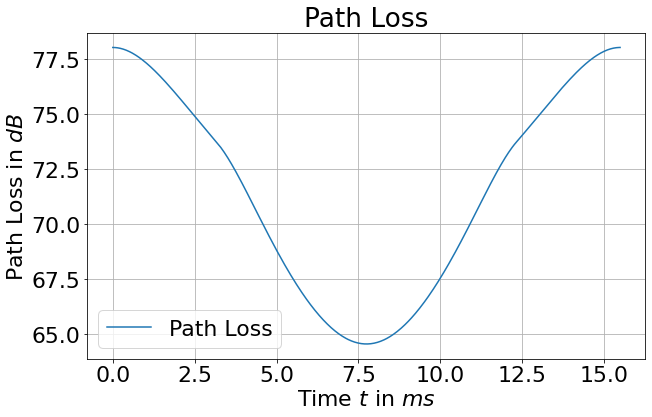

In [20]:
file = "data/ultrasound_output_loss.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file , delimiter=";", skip_header=1)[:maxNumSamples]

time = data[:,0] * 1e2
loss = data[:,1]

tab = np.array([
    ["Min: ", min(time), min(loss)], 
    ["Max: ", max(time), max(loss)]])
print(tabulate(tab, headers=["","Time [ms]", "Path Loss [dB]"]))

plt.figure("path loss", figsize=(10,6))
plt.plot(time, loss, label="Path Loss")
plt.title("Path Loss")
plt.ylabel("Path Loss in $dB$")
plt.xlabel("Time $t$ in $ms$")
plt.grid()
plt.legend()
plt.savefig("plots/ultrasound_plot_loss.pdf")
plt.savefig("plots/ultrasound_plot_loss.png")
plt.show()

### Signal Gain Plot

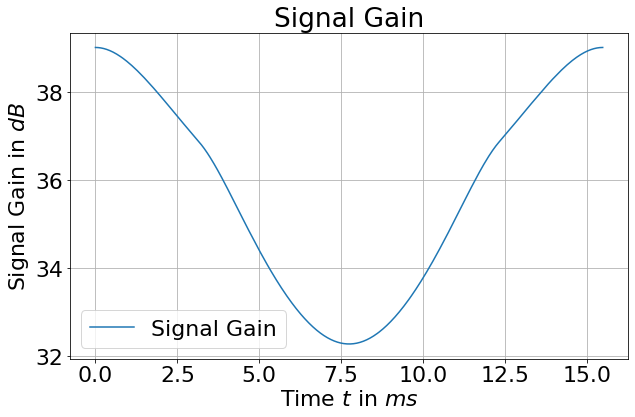

In [21]:
file = "data/ultrasound_output_gain.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[:maxNumSamples]

time = data[:,0] * 1e2
gain = data[:,1]

plt.figure("Gain", figsize=(10,6))
plt.plot(time, gain, label="Signal Gain")
plt.title("Signal Gain")
plt.ylabel("Signal Gain in $dB$")
plt.xlabel("Time $t$ in $ms$")
plt.grid()
plt.legend()
plt.savefig("plots/ultrasound_plot_gain.pdf")
plt.savefig("plots/ultrasound_plot_gain.png")
plt.show()

### Signal Delay

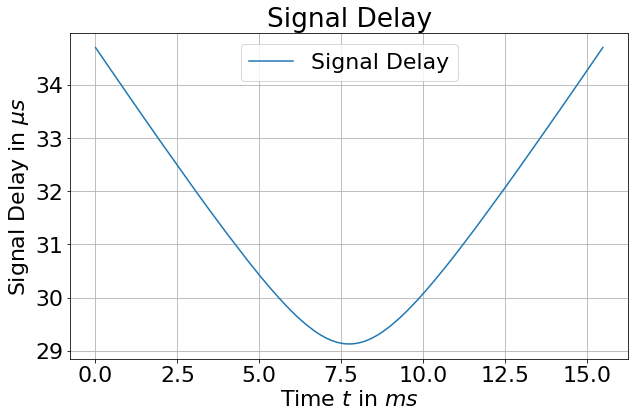

In [22]:
file = "data/ultrasound_output_delay.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[-maxNumSamples:]

time = data[:,0] * 1e2
delay = data[:,1] * 1e6

plt.figure("Delay", figsize=(10,6))
plt.plot(time[:4999], delay[:4999], label="Signal Delay")
plt.title("Signal Delay")
plt.ylabel("Signal Delay in $\mu s$")
plt.xlabel("Time $t$ in $ms$")
plt.grid()
plt.legend()
plt.savefig("plots/ultrasound_plot_delay.pdf")
plt.savefig("plots/ultrasound_plot_delay.png")
plt.show()

### Outgoing Signal

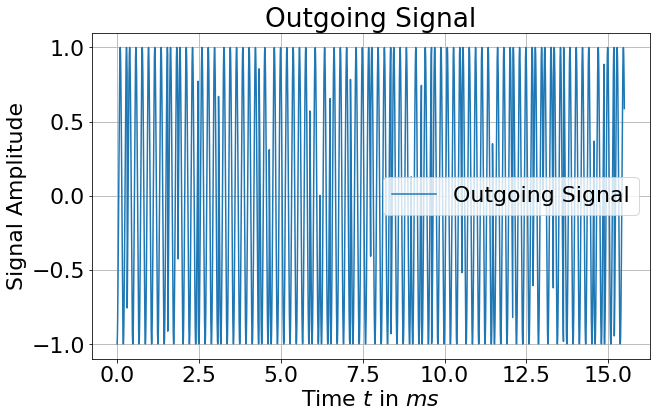

In [26]:
file = "data/ultrasound_output_send_signal.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[:maxNumSamples]

time = data[:,0] * 1e2
signal = data[:,1]

plt.figure("outgoing Signal", figsize=(10, 6))
plt.plot(time, signal, label="Outgoing Signal")
plt.title("Outgoing Signal")
plt.xlabel("Time $t$ in $ms$")
plt.ylabel("Signal Amplitude")
plt.grid()
plt.legend()
plt.savefig("plots/ultrasound_plot_outgoing_signal.pdf")
plt.savefig("plots/ultrasound_plot_outgoing_signal.png")
plt.show()

### Received Signal with Doppler and Gain

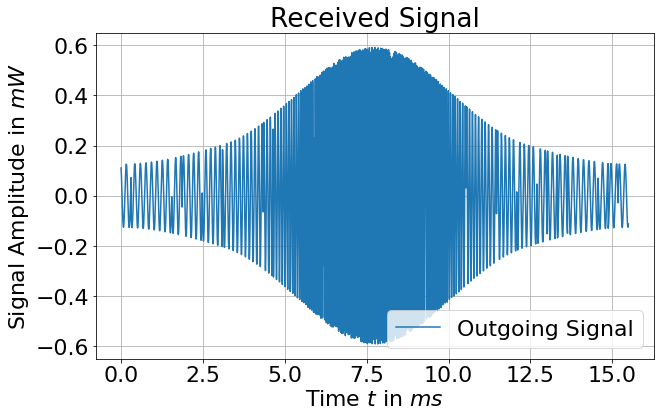

In [33]:
file ="data/ultrasound_output_recv_signal.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[:maxNumSamples]

time = data[:,0] * 1e2
signal = data[:,1] * 1e3

plt.figure("Received Signal", figsize=(10, 6))
plt.plot(time, signal, label="Outgoing Signal")
plt.title("Received Signal")
plt.xlabel("Time $t$ in $ms$")
plt.ylabel("Signal Amplitude in $mW$")
plt.grid()
plt.legend()
plt.savefig("plots/ultrasound_plot_received_signal.pdf")
plt.savefig("plots/ultrasound_plot_received_signal.png")
plt.show()

### demod receive signal

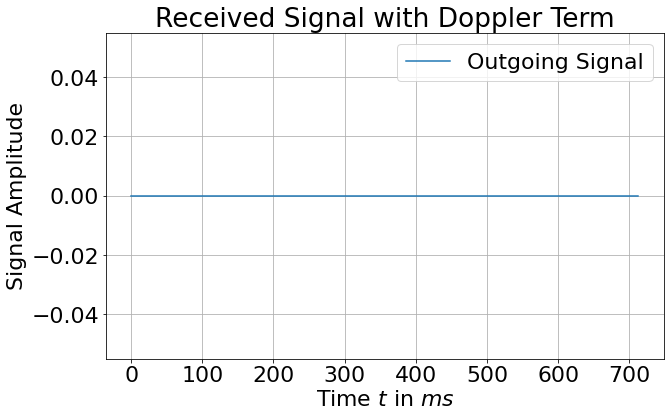

In [25]:
file ="data/ultrasound_output_demod_signal.csv"
deleteLinesOfFile(file, 1)
data = np.genfromtxt(file, delimiter=";", skip_header=1)[:maxNumSamples]
#data = np.genfromtxt(file, delimiter=";", skip_header=1)[:maxNumSamples]

signal = data[:,1]

plt.figure("Received Signal with Doppler", figsize=(10, 6))
plt.plot(signal, label="Outgoing Signal")
plt.title("Received Signal with Doppler Term")
plt.xlabel("Time $t$ in $ms$")
plt.ylabel("Signal Amplitude")
plt.grid()
plt.legend()
plt.savefig("plots/ultrasound_plot_received_signal.pdf")
plt.savefig("plots/ultrasound_plot_received_signal.png")
plt.show()